# Cryptocurrencies project

Libraries

In [1]:
#General
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Cleaning & processing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from scipy.stats import ttest_1samp
#API & time series
import yfinance as yf
import mplfinance as mpf
import datetime
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARMA
#Visualization
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Relations study

I will get the data with yahoo finance API. I will get the data from the last 4 years because before it there are no data for some cryptos and it is the period when they have evolved more.

Some help here: https://analyzingalpha.com/blog/yfinance-python

In [2]:
DAYS = 1460     #The number of days to get data (last 4 years)
valors = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'ADA-USD', 'BNB-USD', 'XLM-USD', 'DOGE-USD', 'LTC-USD', 'MKR-USD', 'EURUSD=X', 'GC=F', 'SI=F', 'CL=F', 'AAPL', 'NKE', 'GOOG', 'AMZN', 'NQ=F']  #Data I want
names_list = ['btc', 'eth', 'xrp', 'ada', 'bnb', 'xlm', 'doge', 'ltc', 'maker', 'eur', 'gold', 'silver', 'oil', 'apple', 'nike', 'google', 'amazon', 'nasdaq']

start = (datetime.date.today() - datetime.timedelta(DAYS))
end = datetime.datetime.today()

for i in range(len(valors)):
    locals()[names_list[i]] = yf.download(valors[i], start=start, end=end, interval='1d')    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-09,9414.690430,9466.349609,8513.030273,9337.549805,9337.549805,8704190464
2018-03-10,9350.589844,9531.320312,8828.469727,8866.000000,8866.000000,5386319872
2018-03-11,8852.780273,9711.889648,8607.120117,9578.629883,9578.629883,6296370176
2018-03-12,9602.929688,9937.500000,8956.429688,9205.120117,9205.120117,6457399808
2018-03-13,9173.040039,9470.379883,8958.190430,9194.849609,9194.849609,5991139840


I will create a DF with all the currencies and their prices each day

In [4]:
prices = pd.concat([btc['Close'], eth['Close'], xrp['Close'], ada['Close'], bnb['Close'], xlm['Close'], doge['Close'], ltc['Close'], maker['Close'], eur['Close'], gold['Close'], silver['Close'], oil['Close'], apple['Close'], nike['Close'], google['Close'], amazon['Close'], nasdaq['Close']], axis = 1)
prices.columns = names_list

In [5]:
prices.head(20)

,btc,eth,xrp,ada,bnb,xlm,doge,ltc,maker,eur,gold,silver,oil,apple,nike,google,amazon,nasdaq
Date,,,,,,,,,,,,,,,,,,
2018-03-09,9337.549805,728.916016,0.849761,0.222207,8.31307,0.311859,0.004146,187.167999,827.315002,1.230663,1322.400024,16.546000,62.040001,44.994999,66.300003,1160.040039,1578.890015,7098.25
2018-03-10,8866.000000,686.890015,0.796627,0.209873,7.67166,0.292661,0.003973,177.731995,795.994019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-11,9578.629883,723.338989,0.831122,0.223498,8.27238,0.304217,0.004210,188.945999,833.432983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12,9205.120117,699.830994,0.801048,0.223722,8.03927,0.291765,0.004032,178.233994,810.510986,1.230875,1319.400024,16.471001,61.360001,45.430000,66.820000,1164.500000,1598.390015,7139.50
2018-03-13,9194.849609,690.827026,0.789711,0.223026,10.11520,0.290193,0.003960,175.781998,804.291992,1.233958,1325.900024,16.559000,60.709999,44.992500,66.169998,1138.170044,1588.180054,7058.25
2018-03-14,8269.809570,614.291016,0.701902,0.199562,8.95921,0.248689,0.003524,161.100998,750.184021,1.239234,1324.400024,16.466999,60.959999,44.610001,66.199997,1149.489990,1591.000000,7033.50
2018-03-15,8300.860352,611.304016,0.697269,0.185709,9.09908,0.240655,0.003536,164.475998,734.200012,1.237562,1316.800049,16.353001,61.189999,44.662498,66.389999,1149.579956,1582.319946,7046.50
2018-03-16,8338.349609,601.666016,0.689260,0.178878,9.11132,0.229991,0.003510,165.449997,710.598022,1.230921,1311.300049,16.202000,62.340000,44.505001,65.910004,1135.729980,1571.680054,7044.00
2018-03-17,7916.879883,552.778992,0.637856,0.154763,8.98774,0.206731,0.003299,152.968994,662.708984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data

#### Duplicates

In [6]:
print("Length of the dataset:", len(prices))
print("Length of the dataset without duplicates:", len(prices.drop_duplicates()))

Length of the dataset: 1462
Length of the dataset without duplicates: 1462


Duplicates have no sense this time because each row corresponds to a different date

#### NaNs

In [7]:
prices.isna().sum()

btc         0
eth         0
xrp         0
ada         0
bnb         0
xlm         0
doge        0
ltc         0
maker       0
eur       419
gold      453
silver    454
oil       453
apple     455
nike      455
google    455
amazon    455
nasdaq    453
dtype: int64

As I can observe in the dataset, I have NaNs in different columns, because there are no data for some valors on weekends (markets are closed) so I will fill them with the last value I had before (value which corresponds to the last market close) 

In [8]:
cols = ['eur', 'gold', 'silver', 'oil', 'apple', 'nike', 'google', 'amazon', 'nasdaq']
for i in range(len(cols)):
    for row in range(len(prices)):
        if prices[cols[i]][row] > 0:
            prices[cols[i]][row] = prices[cols[i]][row]
        else: 
            prices[cols[i]][row] = prices[cols[i]][row-1]

### Graphics

#### Cryptos

Text(0.5, 1.0, 'BTC evolution')

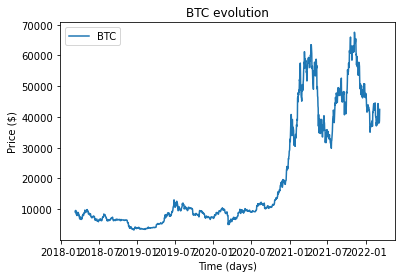

In [9]:
plt.plot(prices.btc, label = "BTC")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("BTC evolution")

Text(0.5, 1.0, 'ETH evolution')

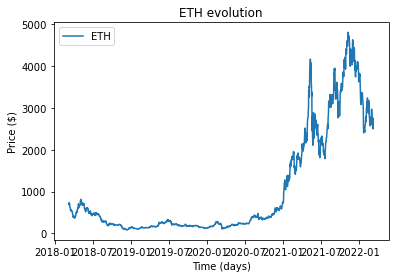

In [10]:
plt.plot(prices.eth, label = "ETH")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("ETH evolution")

Text(0.5, 1.0, 'XRP evolution')

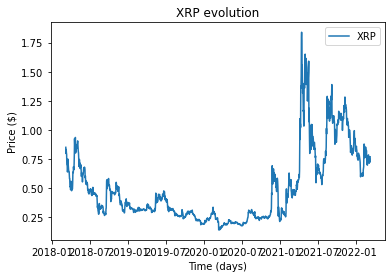

In [11]:
plt.plot(prices.xrp, label = "XRP")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("XRP evolution")

Text(0.5, 1.0, 'ADA evolution')

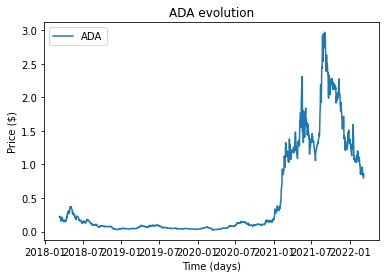

In [12]:
plt.plot(prices.ada, label = "ADA")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("ADA evolution")

Text(0.5, 1.0, 'BNB evolution')

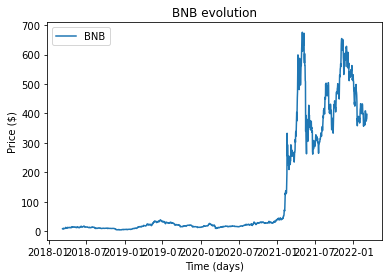

In [13]:
plt.plot(prices.bnb, label = "BNB")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("BNB evolution")

Text(0.5, 1.0, 'XLM evolution')

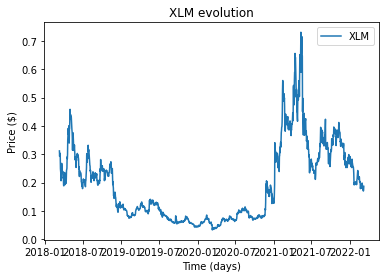

In [14]:
plt.plot(prices.xlm, label = "XLM")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("XLM evolution")

Text(0.5, 1.0, 'DOGE evolution')

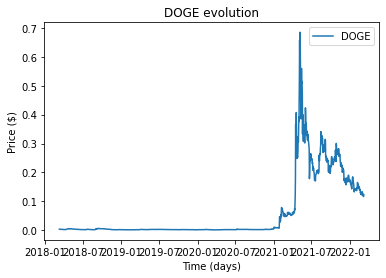

In [15]:
plt.plot(prices.doge, label = "DOGE")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("DOGE evolution")

Text(0.5, 1.0, 'LITECOIN evolution')

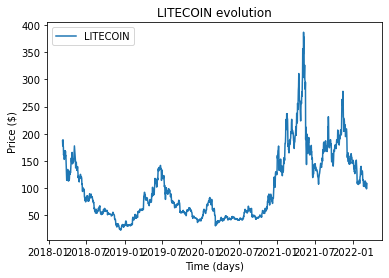

In [16]:
plt.plot(prices.ltc, label = "LITECOIN")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("LITECOIN evolution")

Text(0.5, 1.0, 'MAKER evolution')

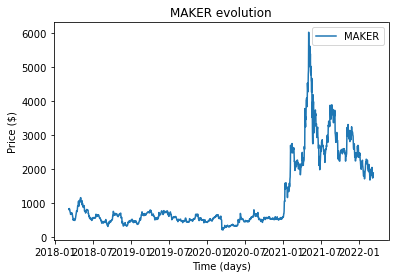

In [17]:
plt.plot(prices.maker, label = "MAKER")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("MAKER evolution")

As I can observe, the behavior of the cryptocurrencies is pretty similar among them, bridging the price differences

#### Other markets

Text(0.5, 1.0, 'Gold evolution')

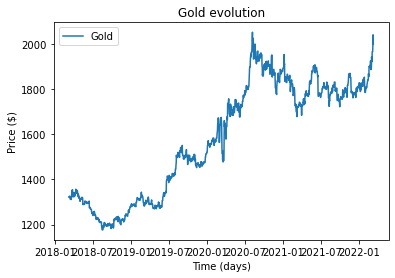

In [18]:
plt.plot(prices.gold, label = "Gold")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("Gold evolution")

Text(0.5, 1.0, 'Apple evolution')

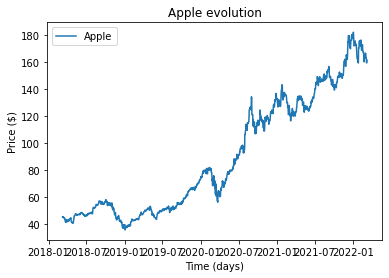

In [19]:
plt.plot(prices.apple, label = "Apple")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("Apple evolution")

Text(0.5, 1.0, 'Google evolution')

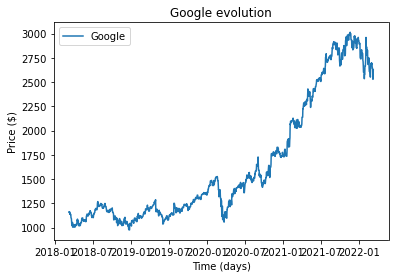

In [20]:
plt.plot(prices.google, label = "Google")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("Google evolution")

Text(0.5, 1.0, 'Nasdaq evolution')

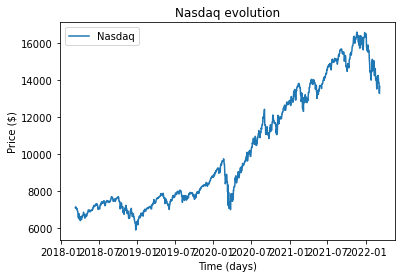

In [21]:
plt.plot(prices.nasdaq, label = "Nasdaq")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.title("Nasdaq evolution")

Gold prices or stocks prices have increased in the last years but more gradually than cryptocurrencies

#### Scaling

I'm going to scale all to be able to compare some of them togheter 

In [22]:
#MinMaxScaler
transformer = MinMaxScaler().fit(prices)
prices_scaled = pd.DataFrame(transformer.transform(prices), columns=prices.columns, index=prices.index)

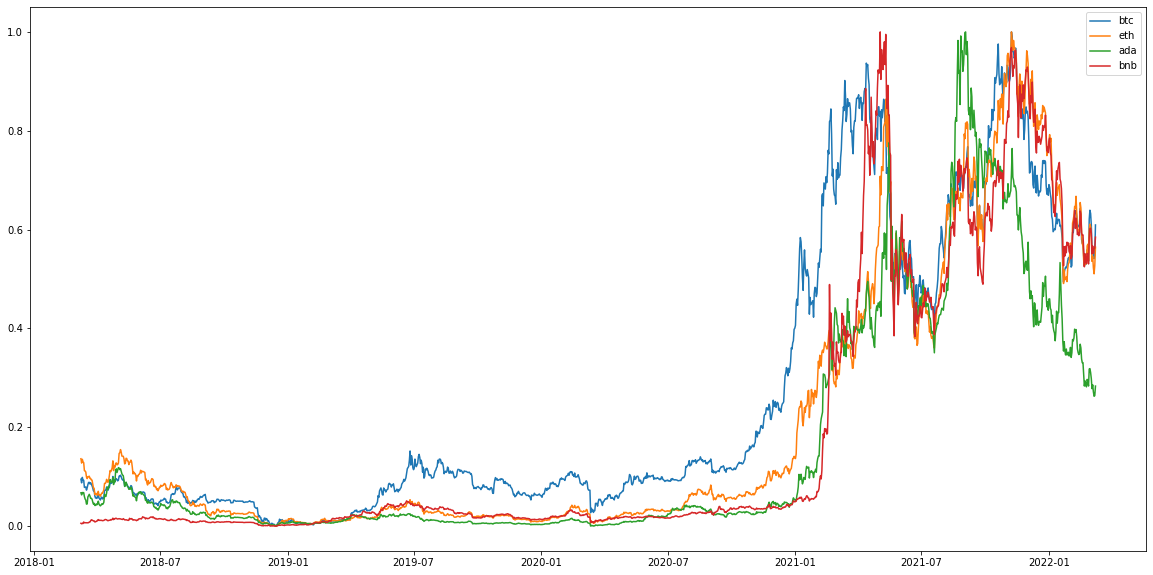

In [23]:
names_list2 = ['btc', 'eth', 'ada', 'bnb']
plt.figure(figsize=(20, 10))
for i in range(len(names_list2)):
    plt.plot(prices_scaled[names_list2[i]], label = names_list2[i])
plt.legend()

As I can observe, the behaviour is similar

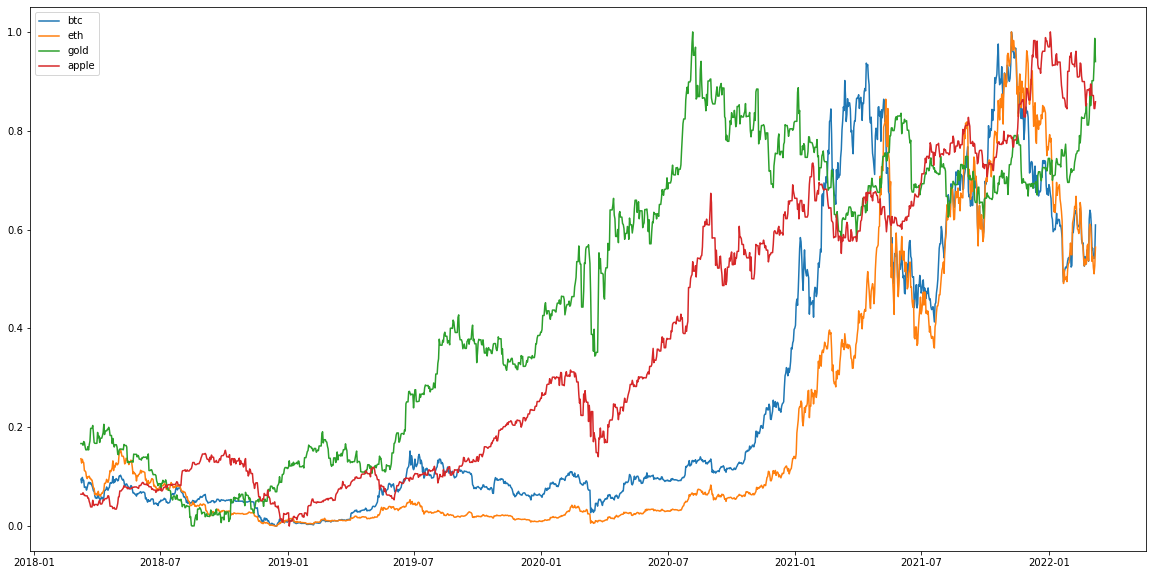

In [24]:
names_list2 = ['btc', 'eth', 'gold', 'apple']
plt.figure(figsize=(20, 10))
for i in range(len(names_list2)):
    plt.plot(prices_scaled[names_list2[i]], label = names_list2[i])
plt.legend()

This time, I can see that everything has grown in the last years but with different behaviours

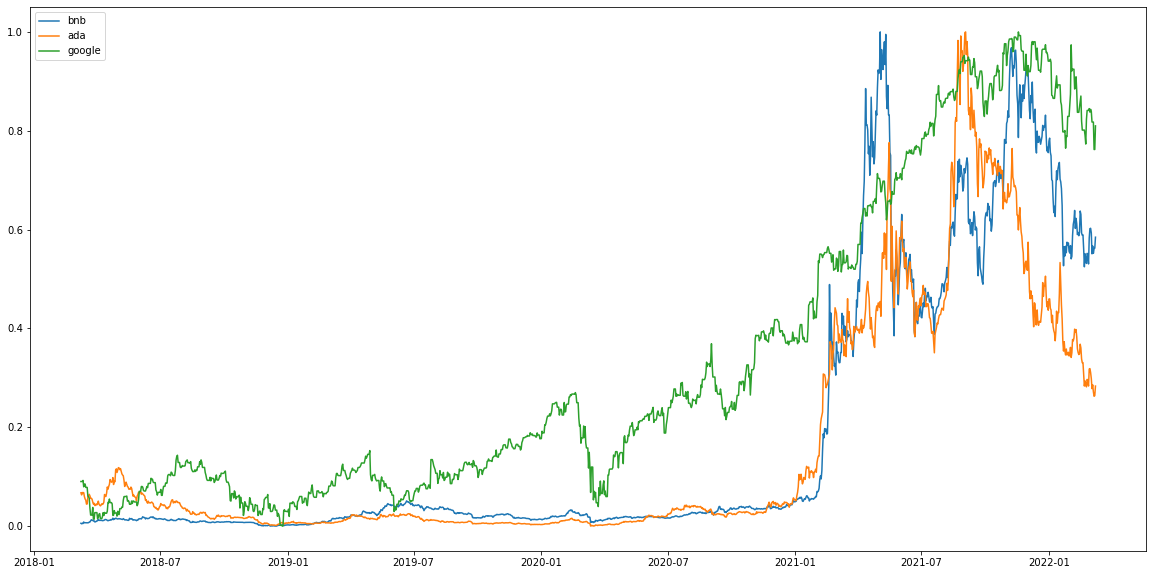

In [25]:
names_list2 = ['bnb', 'ada', 'google']
plt.figure(figsize=(20, 10))
for i in range(len(names_list2)):
    plt.plot(prices_scaled[names_list2[i]], label = names_list2[i])
plt.legend()

BNB and ADA have groth a lot in the last year and google has been growing gradually

### Correlations

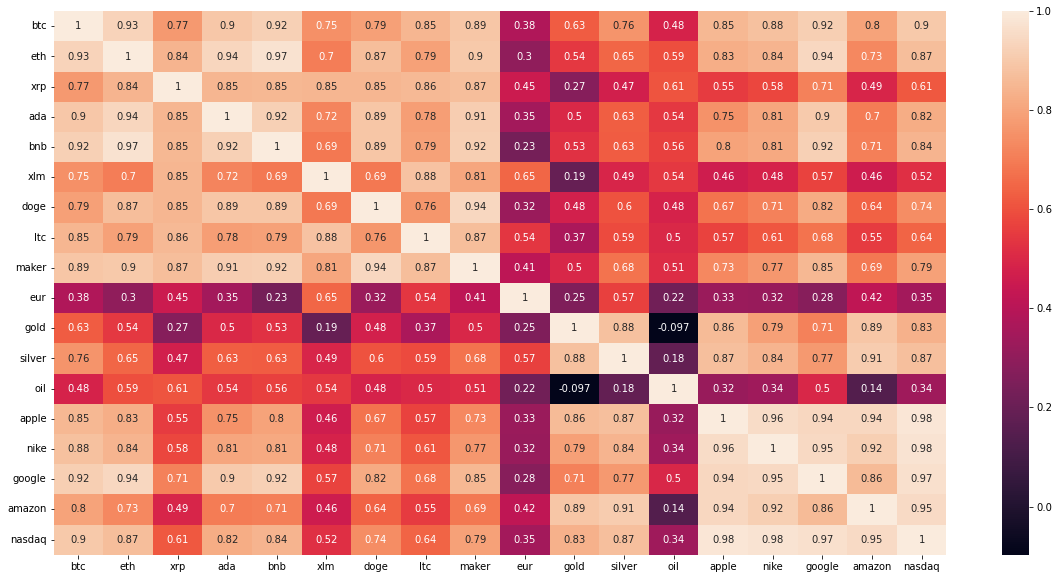

In [26]:
plt.figure(figsize=(20, 10))
correlations_matrix = prices.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Correlations are pretty interesting, I can observe that cryptos are very correlated among them and stocks too. But, I can also see that cryptos are highly correlated with the stock prices, that shows that all have increased their price during the last years.

### Price increase

I will study how many has been increased/decreased price of each one since the first day I have data, until today. 

In [27]:
def percent_change(start, actual):
    percent = ((actual-start)/start)*100
    return percent

In [28]:
print("Price study respect USD: \n")
for i in range(len(names_list)):
    print('---', names_list[i], '---')
    print("Max:", max(prices[names_list[i]]))
    print("Date:", prices[names_list[i]].idxmax())
    print("Min:", min(prices[names_list[i]]))
    print("Date:", prices[names_list[i]].idxmin())
    print("Actual price:", prices[names_list[i]][len(prices)-1])
    print("Start price:", prices[names_list[i]][0])
    print("Start Date of the data:", prices.index[0])
    print("Variation(%):", percent_change((prices[names_list[i]][0]), (prices[names_list[i]][len(prices)-1])))


Price study respect USD: 

--- btc ---
Max: 67566.828125
Date: 2021-11-08 00:00:00
Min: 3236.76171875
Date: 2018-12-15 00:00:00
Actual price: 42437.73828125
Start price: 9337.5498046875
Start Date of the data: 2018-03-09 00:00:00
Variation(%): 354.484732814448
--- eth ---
Max: 4812.08740234375
Date: 2021-11-08 00:00:00
Min: 84.30829620361328
Date: 2018-12-14 00:00:00
Actual price: 2752.54638671875
Start price: 728.916015625
Start Date of the data: 2018-03-09 00:00:00
Variation(%): 277.62188341528116
--- xrp ---
Max: 1.8392360210418701
Date: 2021-04-14 00:00:00
Min: 0.13963499665260315
Date: 2020-03-12 00:00:00
Actual price: 0.7682749032974243
Start price: 0.8497610092163086
Start Date of the data: 2018-03-09 00:00:00
Variation(%): -9.589296877016606
--- ada ---
Max: 2.9682390689849854
Date: 2021-09-03 00:00:00
Min: 0.02396100014448166
Date: 2020-03-12 00:00:00
Actual price: 0.8582635521888733
Start price: 0.2222069948911667
Start Date of the data: 2018-03-09 00:00:00
Variation(%): 286.

As I can observe, there are interesting variations, I can see that XRP or XLM have lost value and, for example BNB has groth 4650%.

### Evolution

Creating a new column with the variation of each currency to see its evolution

In [29]:
new_cols = ['btc-var', 'eth-var', 'xrp-var', 'ada-var', 'bnb-var', 'xlm-var', 'doge-var', 'ltc-var', 'maker-var', 'eur-var', 'gold-var', 'silver-var', 'oil-var', 'apple-var', 'nike-var', 'google-var', 'amazon-var', 'nasdaq-var']
for n in range(len(new_cols)):
    #Creating the column
    prices[new_cols[n]]= 0.0
    #Filling it 
    for i in range(len(prices)): 
        prices[new_cols[n]][i] = percent_change((prices[names_list[n]][0]), (prices[names_list[n]][i]))


Plotting them

Text(0.5, 1.0, 'Growth comparison')

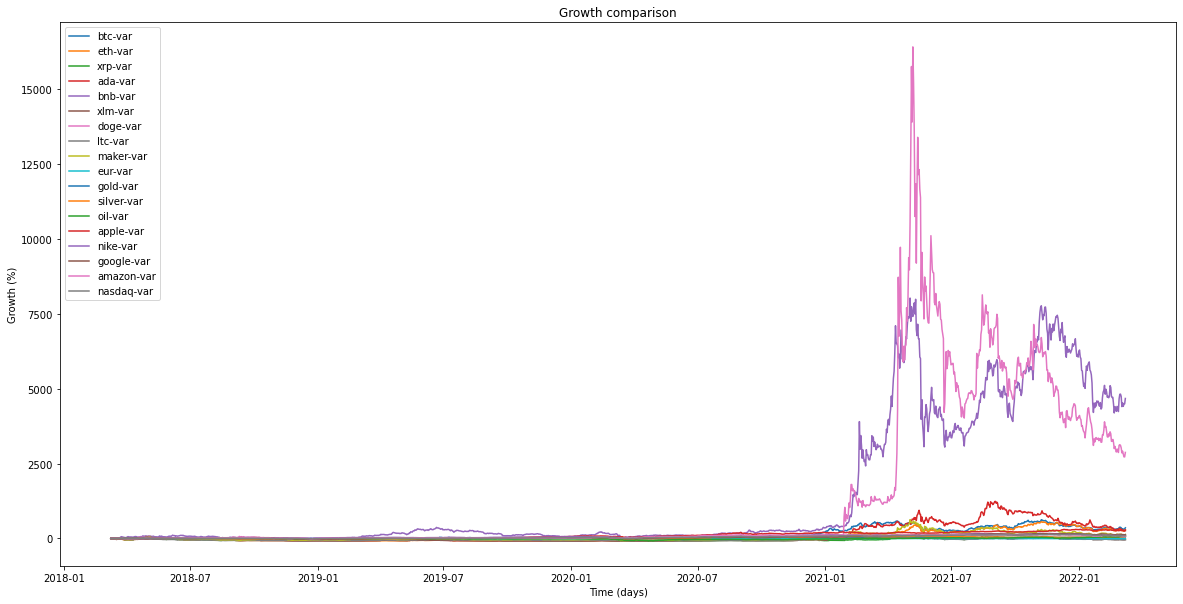

In [30]:
plt.figure(figsize=(20, 10))
for n in range(len(new_cols)):
    plt.plot(prices[new_cols[n]], label = new_cols[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Growth (%)")
plt.title("Growth comparison")

I can see that DOGE and BNB have had a brutal increase in the last year

Now, I'll plot BTC & ETH which are the most important cryptos compared with other actives

Text(0.5, 1.0, 'Growth comparison')

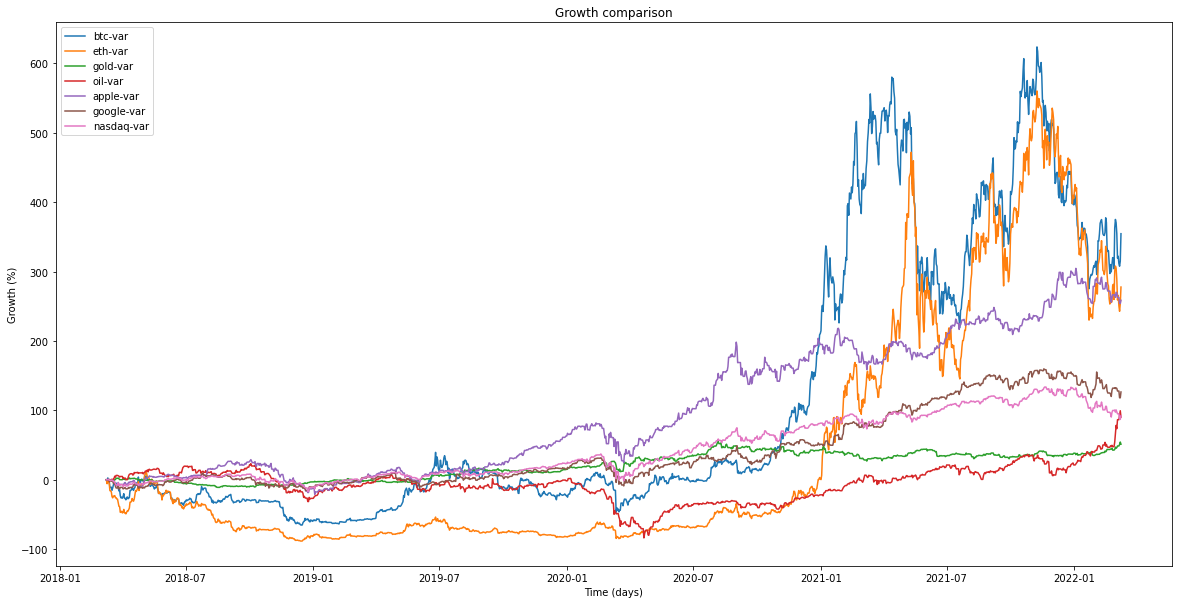

In [31]:
comp_cols = ['btc-var', 'eth-var', 'gold-var', 'oil-var', 'apple-var', 'google-var', 'nasdaq-var']
plt.figure(figsize=(20, 10))
for n in range(len(comp_cols)):
    plt.plot(prices[comp_cols[n]], label = comp_cols[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Growth (%)")
plt.title("Growth comparison")

As I can observe, the patrons are different, cryptos have high volatility and other actives, like apple or nasdaq, evolve more gradually

### Evolution Day by Day

I'm going to study the evolution day by day in the last year from BTC, ETH, BNB, Gold, Apple and Google

In [32]:
prices_by_day = prices.iloc[-365:, [0,1,4,10,13,15, 17]] #I will take the last 365 rows (data from last year) and the columns which correspond to the data I want
prices_by_day.head()

,btc,eth,bnb,gold,apple,google,nasdaq
Date,,,,,,,
2021-03-10,56008.550781,1799.166260,279.358032,1721.500000,119.980003,2055.030029,12749.25
2021-03-11,57805.121094,1826.194946,289.790802,1722.300049,121.959999,2114.770020,13048.25
2021-03-12,57332.089844,1772.102417,263.685822,1719.500000,121.029999,2061.919922,12933.50
2021-03-13,61243.085938,1924.685425,276.104706,1719.500000,121.029999,2061.919922,12933.50
2021-03-14,59302.316406,1854.564331,264.636749,1719.500000,121.029999,2061.919922,12933.50


In [33]:
names_list3 = ['btc', 'eth', 'bnb', 'gold', 'apple', 'google', 'nasdaq']
new_cols2 = ['btc-day_var', 'eth-day_var', 'bnb-day_var', 'gold-day_var', 'apple-day_var', 'google-day_var', 'nasdaq-day_var']
for n in range(len(new_cols2)):
    #Creating the column
    prices_by_day[new_cols2[n]]= 0.0
    #Filling it with the variation in % respect the last day
    for i in range((len(prices_by_day)-1)):
        i = i + 1
        prices_by_day[new_cols2[n]][i] = percent_change((prices_by_day[names_list3[n]][(i-1)]), (prices_by_day[names_list3[n]][i]))


In [34]:
prices_by_day.head()

,btc,eth,bnb,gold,apple,google,nasdaq,btc-day_var,eth-day_var,bnb-day_var,gold-day_var,apple-day_var,google-day_var,nasdaq-day_var
Date,,,,,,,,,,,,,,
2021-03-10,56008.550781,1799.166260,279.358032,1721.500000,119.980003,2055.030029,12749.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-03-11,57805.121094,1826.194946,289.790802,1722.300049,121.959999,2114.770020,13048.25,3.207671,1.502290,3.734552,0.046474,1.650271,2.907013,2.345236
2021-03-12,57332.089844,1772.102417,263.685822,1719.500000,121.029999,2061.919922,12933.50,-0.818321,-2.962035,-9.008216,-0.162576,-0.762545,-2.499094,-0.879428
2021-03-13,61243.085938,1924.685425,276.104706,1719.500000,121.029999,2061.919922,12933.50,6.821653,8.610282,4.709728,0.000000,0.000000,0.000000,0.000000
2021-03-14,59302.316406,1854.564331,264.636749,1719.500000,121.029999,2061.919922,12933.50,-3.168961,-3.643250,-4.153481,0.000000,0.000000,0.000000,0.000000


##### Correlations

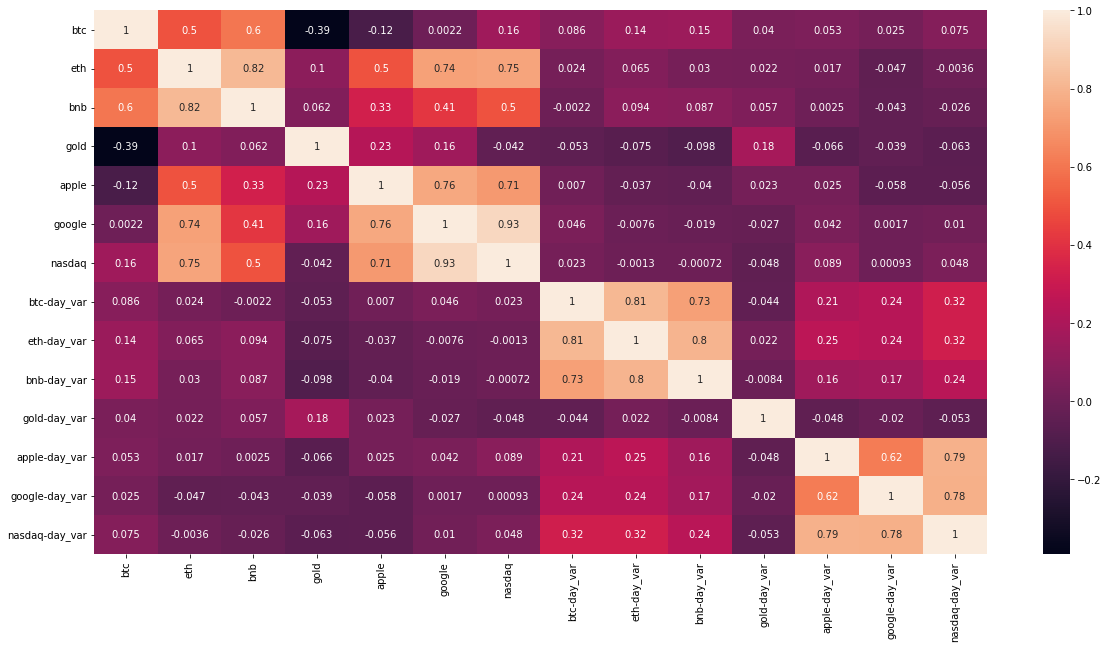

In [35]:
plt.figure(figsize=(20, 10))
correlations_matrix = prices_by_day.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Cryptos are correlated among them and some stocks too but I can not see any interesting correlation between cryptos and actives.

##### Comparing them

Text(0.5, 1.0, 'Variability comparison')

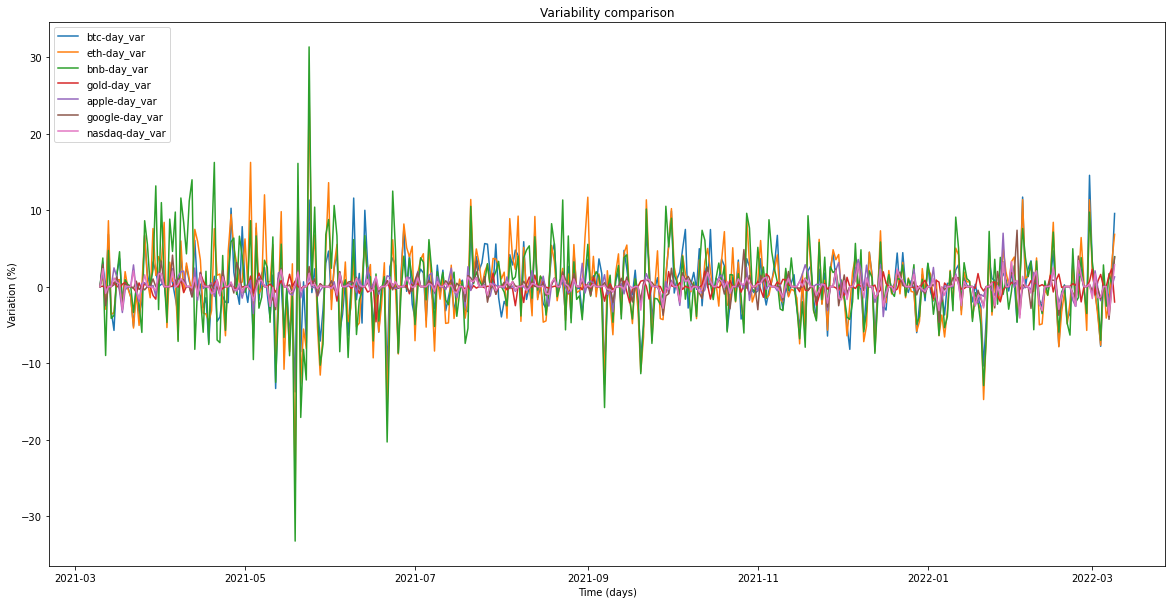

In [36]:
plt.figure(figsize=(20, 10))
for n in range(len(new_cols2)):
    plt.plot(prices_by_day[new_cols2[n]], label = new_cols2[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Variation (%)")
plt.title("Variability comparison")

Let's check each crypto and other actives

Text(0.5, 1.0, 'BTC variability comparison')

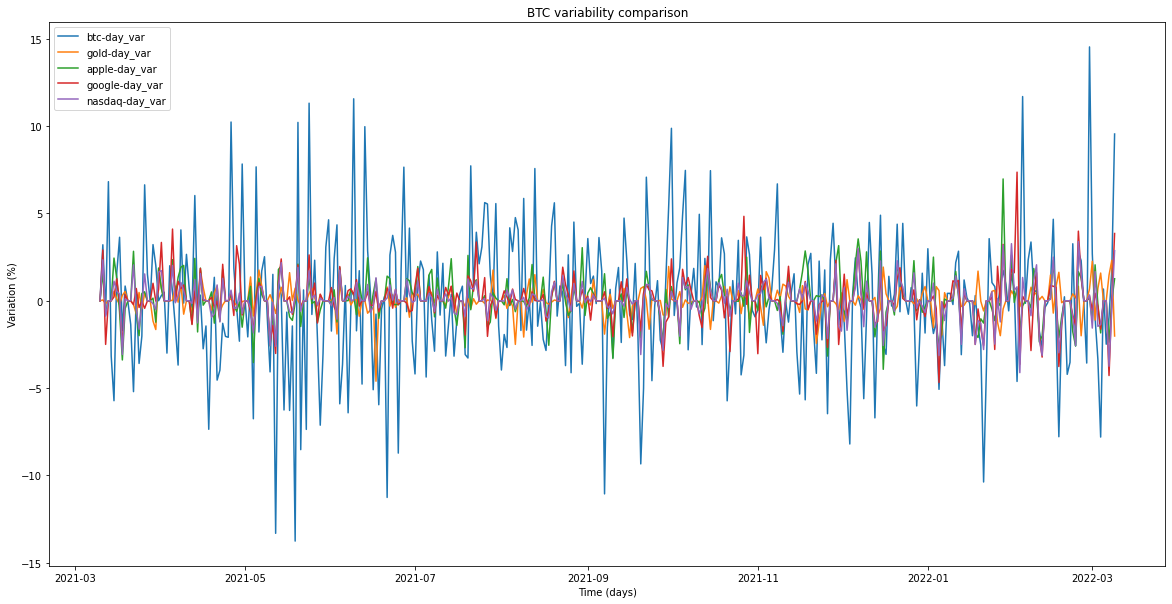

In [37]:
cols_plot = ['btc-day_var', 'gold-day_var', 'apple-day_var', 'google-day_var', 'nasdaq-day_var']
plt.figure(figsize=(20, 10))
for n in range(len(cols_plot)):
    plt.plot(prices_by_day[cols_plot[n]], label = cols_plot[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Variation (%)")
plt.title("BTC variability comparison")

Text(0.5, 1.0, 'ETH variability comparison')

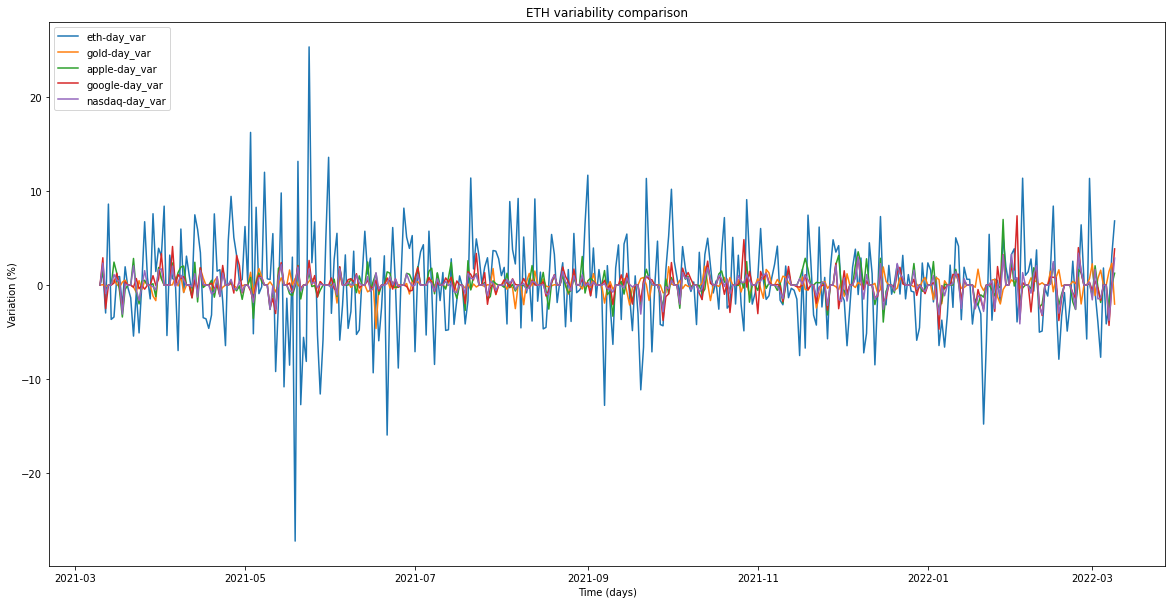

In [38]:
cols_plot = ['eth-day_var', 'gold-day_var', 'apple-day_var', 'google-day_var', 'nasdaq-day_var']
plt.figure(figsize=(20, 10))
for n in range(len(cols_plot)):
    plt.plot(prices_by_day[cols_plot[n]], label = cols_plot[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Variation (%)")
plt.title("ETH variability comparison")

Text(0.5, 1.0, 'BNB variability comparison')

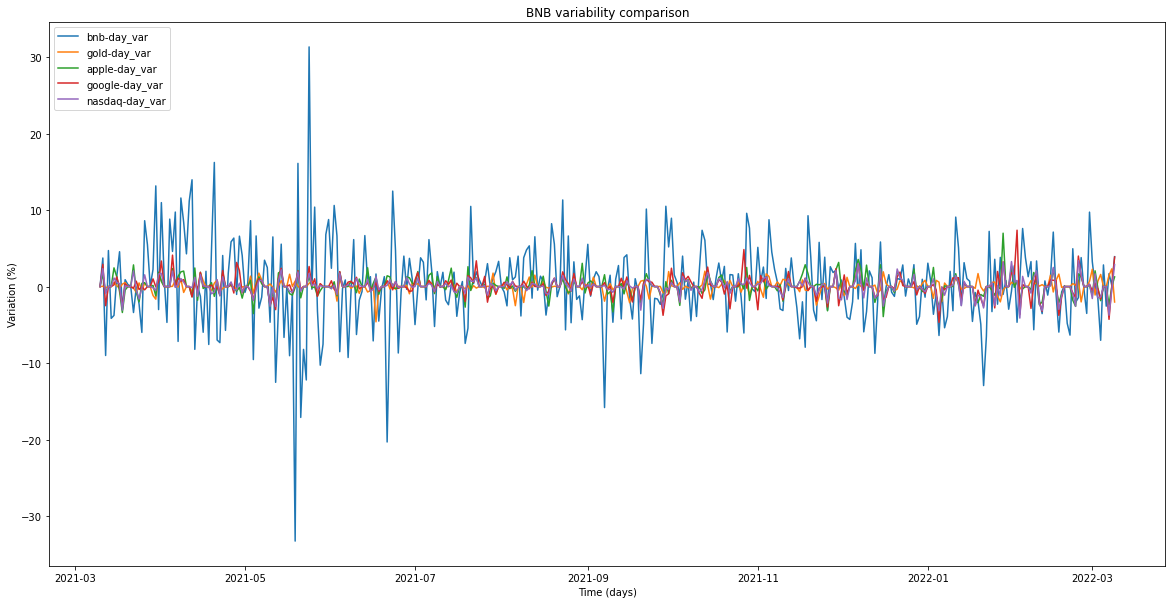

In [39]:
cols_plot = ['bnb-day_var', 'gold-day_var', 'apple-day_var', 'google-day_var', 'nasdaq-day_var']
plt.figure(figsize=(20, 10))
for n in range(len(cols_plot)):
    plt.plot(prices_by_day[cols_plot[n]], label = cols_plot[n])
plt.legend(loc = 'upper left')
plt.xlabel("Time (days)")
plt.ylabel("Variation (%)")
plt.title("BNB variability comparison")

In the last graphs we can see the volatility of the cryptos compared with other actives. Growing or decreasing their price more than a 20% in just one day.

### Trying to model 

Let's see what happens if I try to predict BTC or ETH price

I will get the data from last year hourly

In [40]:
DAYS = 365     #The number of days to get data (last year)
valors2 = ['BTC-USD', 'ETH-USD']  #Data I want
names_list2 = ['btc_ly', 'eth_ly']

start = (datetime.date.today() - datetime.timedelta(DAYS))
end = datetime.datetime.today()

for i in range(len(valors2)):
    locals()[names_list2[i]] = yf.download(valors2[i], start=start, end=end, interval='1h') 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
btc_ly.head()

,Open,High,Low,Close,Adj Close,Volume
2021-03-08 23:00:00+00:00,51626.562500,52314.070312,51622.132812,52244.082031,52244.082031,0
2021-03-09 00:00:00+00:00,52272.968750,52472.207031,51981.832031,51987.851562,51987.851562,183574528
2021-03-09 01:00:00+00:00,51993.882812,53607.804688,51993.882812,53607.804688,53607.804688,3115028480
2021-03-09 02:00:00+00:00,53598.574219,53654.132812,53293.234375,53582.226562,53582.226562,253505536
2021-03-09 03:00:00+00:00,53575.367188,53993.386719,53474.089844,53808.289062,53808.289062,795402240


#### Time Series Analysis

##### Checking for Autocorrelation (BTC)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

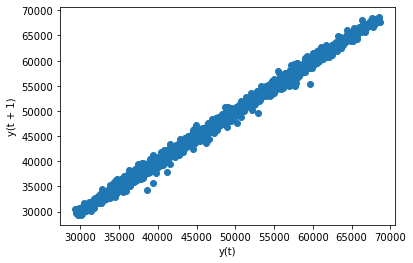

In [42]:
lag_plot(btc_ly.Close)

There is an autoregressive relationship so let's check the model combined with ARMA

##### ARIMA

In [43]:
# fit model
model = ARMA(btc_ly.Close, order=(2,1)) # combined autoregression and moving average: n=2 periods, q= 1 period
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(btc_ly.Close)-5, len(btc_ly.Close)-1)
pd.DataFrame({'observed':btc_ly.Close[-5:], 'predicted':predictions})

,observed,predicted
2022-03-09 13:00:00+00:00,41813.945312,41937.236505
2022-03-09 14:00:00+00:00,42110.156250,41815.531495
2022-03-09 15:00:00+00:00,42384.679688,42124.774922
2022-03-09 16:00:00+00:00,42429.281250,42387.968292
2022-03-09 16:08:00+00:00,42437.738281,42435.644911


As I can observe, the predictions are not good, not only because they are different values, but they do not follow the tendency what could be interesting to take a profit

##### Checking for Autocorrelation (ETH)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

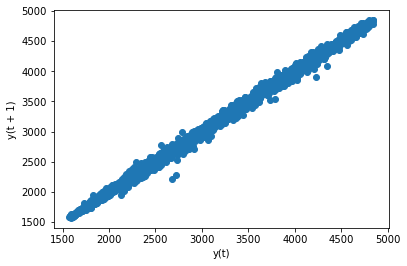

In [44]:
lag_plot(eth_ly.Close)

There is also an autoregressive relationship, let's see this time

##### ARIMA

In [45]:
# fit model
model = ARMA(eth_ly.Close, order=(2,1)) # combined autoregression and moving average: n=2 periods, q= 1 period
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(eth_ly.Close)-5, len(eth_ly.Close)-1)
pd.DataFrame({'observed':eth_ly.Close[-5:], 'predicted':predictions})

,observed,predicted
2022-03-09 13:00:00+00:00,2724.644531,2740.596507
2022-03-09 14:00:00+00:00,2732.662109,2724.494232
2022-03-09 15:00:00+00:00,2751.403320,2733.148639
2022-03-09 16:00:00+00:00,2752.324463,2751.706677
2022-03-09 16:08:00+00:00,2752.546387,2752.388609


Again, same as BTC, I do not get interesting predictions 

#### Exporting tables

In [46]:
prices.to_csv("Prices.csv", index=True)
btc_ly.to_csv("BTC.csv", index=True)
eth_ly.to_csv("ETH.csv", index=True)
prices_by_day.to_csv("PricesByDay.csv", index=True)

## Fraud study

In [47]:
fraud_df = pd.read_csv('ETH_trans.csv')

In [48]:
display(fraud_df.shape)
fraud_df.head()

(9841, 49)

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Renaming columns

In [49]:
fraud_df.columns = fraud_df.columns.str.replace(' ', '_')
fraud_df= fraud_df.rename(columns=str.lower)

### Cleaning data

#### Duplicates

In [50]:
print("Length of the dataset:", len(fraud_df))
print("Length of the dataset without duplicates:", len(fraud_df.drop_duplicates()))

Length of the dataset: 9841
Length of the dataset without duplicates: 9823


In [51]:
fraud_df = fraud_df.drop_duplicates()

#### NaNs

In [52]:
fraud_df.isna().sum()

address                                                   0
flag                                                      0
avg_min_between_sent_tnx                                  0
avg_min_between_received_tnx                              0
time_diff_between_first_and_last_(mins)                   0
sent_tnx                                                  0
received_tnx                                              0
number_of_created_contracts                               0
unique_received_from_addresses                            0
unique_sent_to_addresses                                  0
min_value_received                                        0
max_value_received_                                       0
avg_val_received                                          0
min_val_sent                                              0
max_val_sent                                              0
avg_val_sent                                              0
min_value_sent_to_contract              

Splitting numerical and categorical columns to fight with NaNs

In [53]:
numericals = fraud_df.select_dtypes(np.number)
categoricals = fraud_df.select_dtypes(object)

I'm going to replace the NaN with the mean in numericals

In [54]:
for col in numericals:
        mean = int(numericals[col].mean())
        fraud_df[col] = numericals[col].fillna(mean)

In [55]:
categoricals.isna().sum()

address                          0
_erc20_most_sent_token_type    841
_erc20_most_rec_token_type     851
dtype: int64

I'm going to replace the NaN with the most common value in categoricals

In [56]:
categoricals._erc20_most_sent_token_type.value_counts()

0                                                         4388
None                                                      1853
                                                          1191
EOS                                                        138
OmiseGO                                                    136
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: _erc20_most_sent_token_type, Length: 305, dtype: int64

In [57]:
fraud_df._erc20_most_sent_token_type = categoricals._erc20_most_sent_token_type.fillna('0')

In [58]:
categoricals._erc20_most_rec_token_type.value_counts()

0                        4388
OmiseGO                   870
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            205
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: _erc20_most_rec_token_type, Length: 467, dtype: int64

In [59]:
fraud_df._erc20_most_rec_token_type = categoricals._erc20_most_rec_token_type.fillna('0')

### Cleaning numericals

In [60]:
numericals = fraud_df.select_dtypes(np.number)

#### Variance

First of all, I will eliminate those columns without variance

In [61]:
#I have to scale them
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numericals)

In [62]:
#Selecting those without variance
var_threshold = 0
sel = VarianceThreshold(threshold=(var_threshold))
sel = sel.fit(numerical_scaled)

In [63]:
#Creating a list where true if variance > 0
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
#Getting those columns where variance = 0
drop_columns_list = [col[0] for col in zip(numericals.columns, var_list) if col[1] == False]
drop_columns_list

['_erc20_avg_time_between_sent_tnx',
 '_erc20_avg_time_between_rec_tnx',
 '_erc20_avg_time_between_rec_2_tnx',
 '_erc20_avg_time_between_contract_tnx',
 '_erc20_min_val_sent_contract',
 '_erc20_max_val_sent_contract',
 '_erc20_avg_val_sent_contract']

In [64]:
#Dropping them
for i in range(len(drop_columns_list)):
    numericals = numericals.drop([drop_columns_list[i]], axis=1)

#### Correlations

Checking correlations

In [65]:
#Correlation matrix
correlations_matrix = numericals.corr()
#Upper part of the matrix
upper_correlations_matrix = correlations_matrix.where( 
    np.triu(np.ones(correlations_matrix.shape), k=1).astype(np.bool))
#Getting pairs
unique_corr_pairs = upper_correlations_matrix.unstack().dropna() 
sorted_mat = unique_corr_pairs.sort_values() 

In [66]:
test = sorted_mat.to_frame()
test.T

total_ether_balance                   \
         max_val_sent total_ether_sent   
0           -0.564878        -0.313816   

  time_diff_between_first_and_last_(mins) total_ether_balance            \
                                     flag    avg_val_received  sent_tnx   
0                               -0.269853           -0.135683 -0.127217   

  avg_min_between_received_tnx      total_ether_balance  \
                          flag unique_sent_to_addresses   
0                     -0.11875                -0.113431   

  total_transactions_(including_tnx_to_create_contract  \
                                                  flag   
0                                          -0.100485     

                       min_value_received received_tnx sent_tnx avg_val_sent  \
  time_diff_between_first_and_last_(mins)         flag     flag         flag   
0                               -0.084856    -0.079493 -0.07813    -0.063358   

  total_transactions_(including_tnx_to_create_contract  \
                          avg_min_between_received_tnx   
0                                          -0.060779     

                  received_tnx                            avg_val_sent  \
  avg_min_between_received_tnx time_diff_between_first_and_last_(mins)   
0                    -0.053542                               -0.045911   

            min_value_received unique_sent_to_addresses total_ether_balance  \
  avg_min_between_received_tnx                     flag        avg_val_sent   
0                    -0.045668                -0.045654           -0.045564   

  total_transactions_(including_tnx_to_create_contract  \
                              avg_min_between_sent_tnx   
0                                          -0.043637     

                      sent_tnx                 avg_val_sent  \
  avg_min_between_received_tnx avg_min_between_received_tnx   
0                     -0.04046                    -0.039904   

          total_ether_balance             received_tnx  \
  number_of_created_contracts avg_min_between_sent_tnx   
0                   -0.037902                -0.035783   

                  sent_tnx unique_received_from_addresses  \
  avg_min_between_sent_tnx                           flag   
0                -0.032318                      -0.032031   

  avg_min_between_sent_tnx unique_received_from_addresses  \
                      flag   avg_min_between_received_tnx   
0                -0.029905                      -0.029605   

  _erc20_uniq_sent_token_name     unique_sent_to_addresses  \
           min_value_received avg_min_between_received_tnx   
0                   -0.027804                    -0.025772   

  _erc20_uniq_rec_token_name _erc20_uniq_rec_contract_addr            \
         total_ether_balance           total_ether_balance      flag   
0                   -0.02399                     -0.023962 -0.023846   

  _erc20_uniq_sent_token_name _erc20_uniq_rec_token_name min_value_received  \
                 avg_val_sent                       flag       received_tnx   
0                   -0.023428                  -0.023001          -0.022908   

  max_val_sent min_value_received _total_erc20_tnxs  \
          flag               flag              flag   
0    -0.022436          -0.021555         -0.021279   

                               _erc20_uniq_rec_addr max_value_received_  \
  avg_min_between_received_tnx  total_ether_balance                flag   
0                    -0.020214            -0.019877           -0.019286   

   _erc20_uniq_sent_token_name _erc20_uniq_sent_addr unique_sent_to_addresses  \
  avg_min_between_received_tnx                  flag avg_min_between_sent_tnx   
0                    -0.018759             -0.017953                -0.017704   

  total_ether_received unique_received_from_addresses _erc20_uniq_rec_addr  \
                  flag       avg_min_between_sent_tnx                 flag   
0            -0.016934                      -0.015936            -0.015675   

In [67]:
#Dropping those with corr > 0.8
drop_columns_list = ['max_val_sent_to_contract', '_erc20_min_val_sent', '_erc20_max_val_sent', '_erc20_avg_val_sent', '_erc20_total_ether_received', 'avg_value_sent_to_contract', '_erc20_uniq_rec_token_name', '_erc20_max_val_rec' ]

In [68]:
#Dropping them
for i in range(len(drop_columns_list)):
    numericals = numericals.drop([drop_columns_list[i]], axis=1)

I'll check low correlations with the label to drop those columns with very low corr

In [69]:
corr_list = numericals.corr()['flag']
corr_list

flag                                                    1.000000
avg_min_between_sent_tnx                               -0.029905
avg_min_between_received_tnx                           -0.118750
time_diff_between_first_and_last_(mins)                -0.269853
sent_tnx                                               -0.078130
received_tnx                                           -0.079493
number_of_created_contracts                            -0.013741
unique_received_from_addresses                         -0.032031
unique_sent_to_addresses                               -0.045654
min_value_received                                     -0.021555
max_value_received_                                    -0.019286
avg_val_received                                       -0.011871
min_val_sent                                            0.006603
max_val_sent                                           -0.022436
avg_val_sent                                           -0.063358
min_value_sent_to_contrac

I will drop those columns with a corr < +-0.01

In [70]:
corr_list = (corr_list < 0.01) & (corr_list > -0.01)
drop_columns_list = [col[0] for col in zip(numericals.columns, corr_list) if col[1] == True]
drop_columns_list

['min_val_sent',
 'min_value_sent_to_contract',
 'total_ether_sent_contracts',
 'total_ether_balance',
 '_erc20_min_val_rec',
 '_erc20_avg_val_rec',
 '_erc20_uniq_sent_token_name']

In [71]:
#Dropping them
for i in range(len(drop_columns_list)):
    numericals = numericals.drop([drop_columns_list[i]], axis=1)

#### Outliers

Splitting numericals

In [72]:
def split(numericals):
    for col in numericals:
        if (numericals[col].nunique()/len(numericals)) > 0.01:
            continuous_df[col] = numericals[col]
        else: 
                discrete_df[col] = numericals[col]
    return continuous_df, discrete_df

In [73]:
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()
continuous_df, discrete_df = split(numericals)

Checking outliers in continuous columns

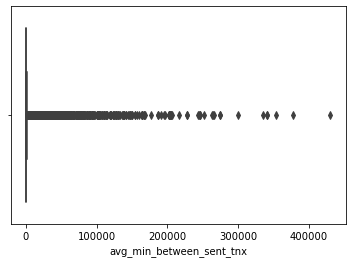

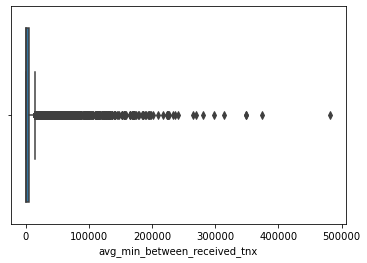

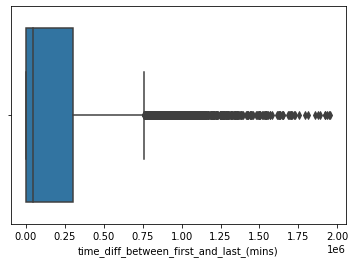

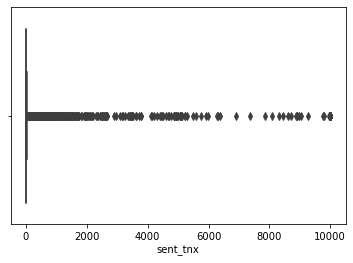

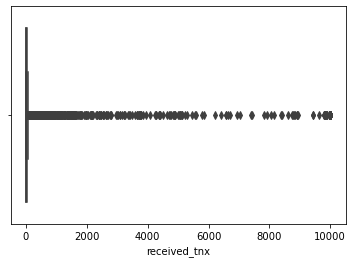

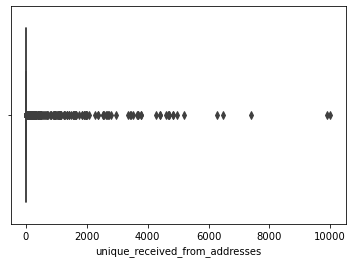

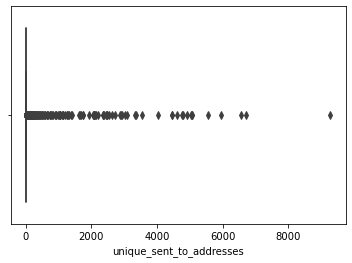

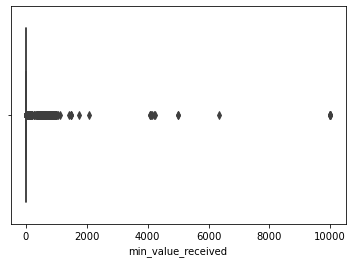

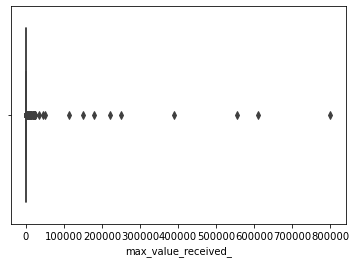

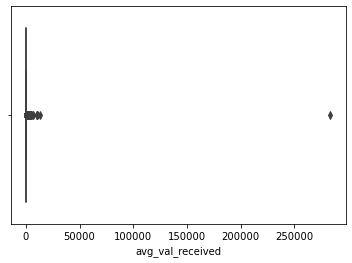

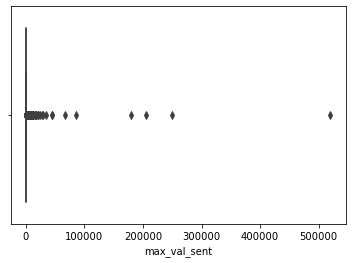

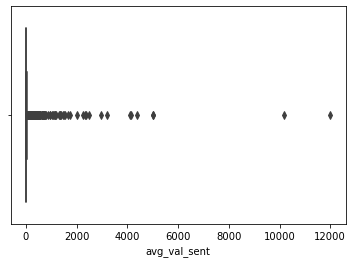

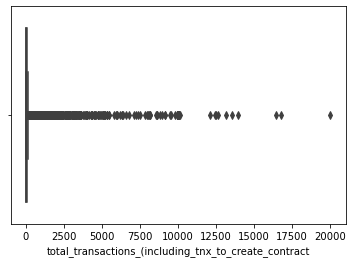

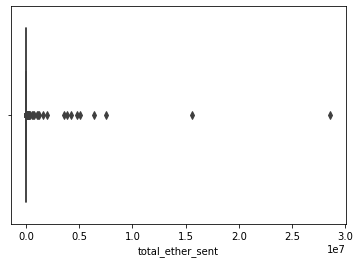

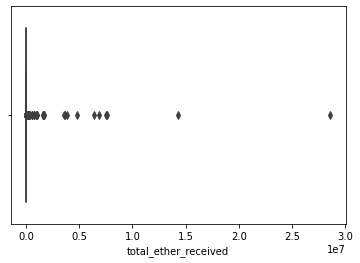

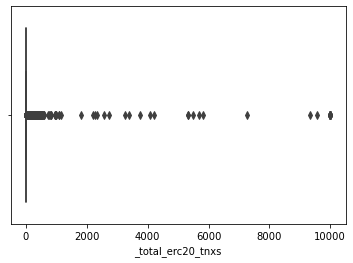

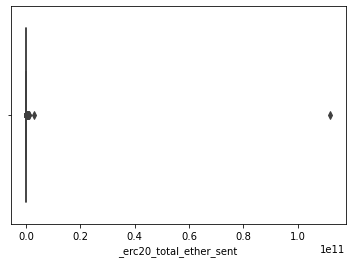

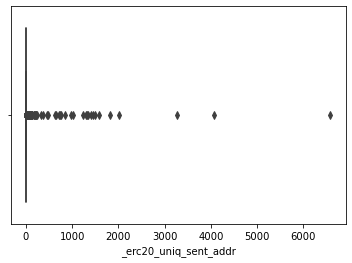

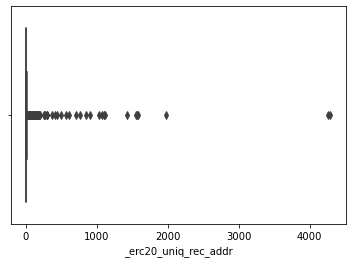

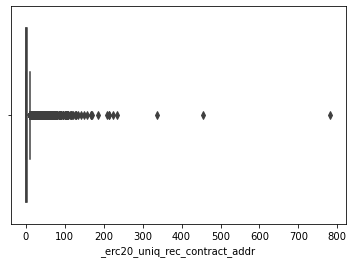

In [74]:
for col in continuous_df.columns:
    sns.boxplot(continuous_df[col])
    plt.show()

As I can see, there are many outliers so I'll count them

In [75]:
for col in continuous_df:
    iqr = np.nanpercentile(continuous_df[col],75) - np.nanpercentile(continuous_df[col],25)
    upper_limit = np.nanpercentile(continuous_df[col],75) + 1.5*iqr
    extraordinary_points = continuous_df[continuous_df[col] > upper_limit]
    print(continuous_df[col].name)
    print("N of outliers:", len(extraordinary_points))
    print("% of outliers:", len(extraordinary_points)/len(continuous_df))
    print("\n")

avg_min_between_sent_tnx
N of outliers: 2100
% of outliers: 0.2137839763819607


avg_min_between_received_tnx
N of outliers: 1370
% of outliers: 0.13946859411585055


time_diff_between_first_and_last_(mins)
N of outliers: 944
% of outliers: 0.0961009874783671


sent_tnx
N of outliers: 1689
% of outliers: 0.17194339814720555


received_tnx
N of outliers: 1675
% of outliers: 0.17051817163799246


unique_received_from_addresses
N of outliers: 1105
% of outliers: 0.11249109233431742


unique_sent_to_addresses
N of outliers: 1525
% of outliers: 0.15524788761070957


min_value_received
N of outliers: 2084
% of outliers: 0.2121551460857172


max_value_received_
N of outliers: 896
% of outliers: 0.09121449658963657


avg_val_received
N of outliers: 1442
% of outliers: 0.14679833044894636


max_val_sent
N of outliers: 911
% of outliers: 0.09274152499236486


avg_val_sent
N of outliers: 655
% of outliers: 0.0666802402524687


total_transactions_(including_tnx_to_create_contract
N of outliers: 15

I will leave the outliers because there are many so I would eliminate a lot info 

### Cleaning categoricals

In [76]:
categoricals.head()

,address,_erc20_most_sent_token_type,_erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS


In [77]:
for col in categoricals.columns:
    print(categoricals[col].value_counts())

0x4c7520df888aa4569a37ac7d132f89c65821f0af    2
0x4c77f6b01da78d053d5885e43bce5239b623dd3e    2
0x4c7accc2689708892be29256fbe9d45a92f0aa97    2
0x4c271764eadcf0d07e5a937b2de290294c9d11c2    2
0x4cad652b71519a7a68d05dada31122c4c9a5ed95    2
                                             ..
0x57441a8c4ab2bc7afaf1d866d62847ce94fea869    1
0x574800f39a26a2b7975ead18fa6b9c0ea1411493    1
0x575882e95351709861cc985a49c313a4cd314409    1
0x5760802a2efecd24bc98c1fb04d3245c214c1e4d    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: address, Length: 9816, dtype: int64
0                                                         4388
None                                                      1853
                                                          1191
EOS                                                        138
OmiseGO                                                    136
                                                          ... 
Arcona Distribution Contract                        

I'll drop the address column because I do not have many information from the same address to study its behaviour

In [78]:
categoricals = categoricals.drop(['address'], axis=1)

In [79]:
fraud_cleaned = pd.concat([numericals, categoricals], axis = 1)

#### Exporting data

In [80]:
fraud_cleaned.to_csv("ETH_fraud.csv", index=False)

#### Correlations with the target

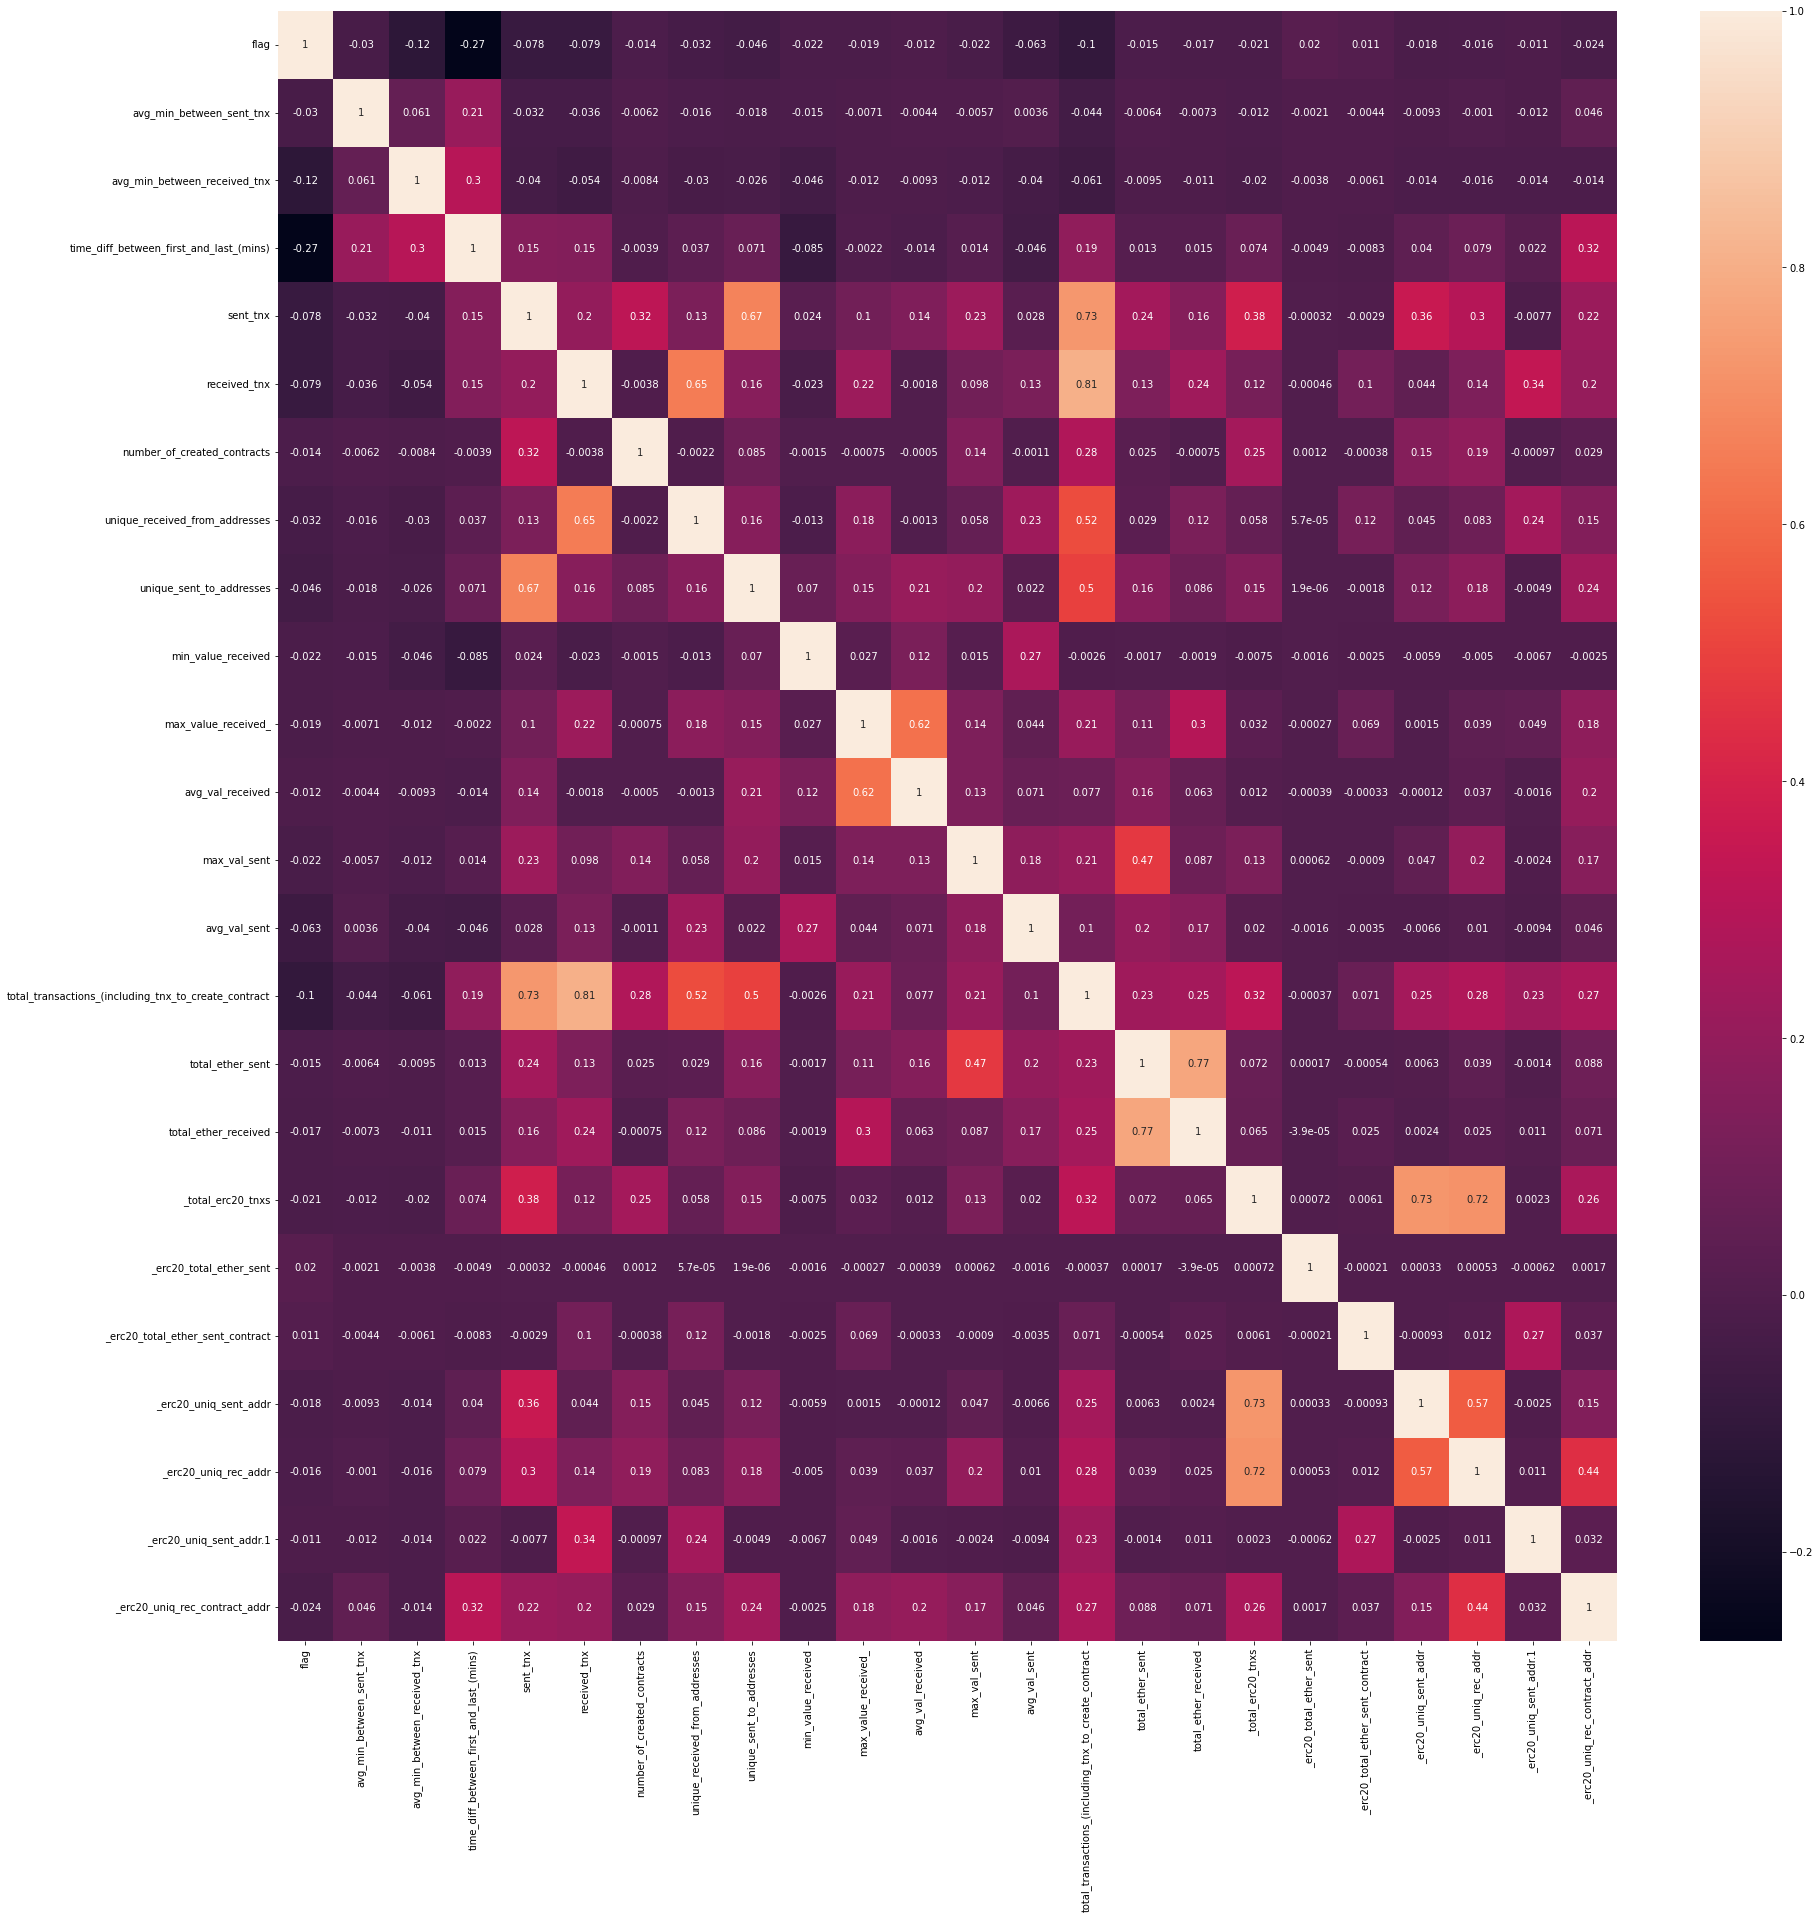

In [81]:
plt.figure(figsize=(30, 30))
correlations_matrix = fraud_cleaned.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Now that data is cleaned, I can see that I do not have high correlations wit the target, in fact, they are very low but I will try to create a model to see what happens

### Models

In [82]:
display(fraud_cleaned.shape)
fraud_cleaned.head()

(9823, 26)

,flag,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last_(mins),sent_tnx,received_tnx,number_of_created_contracts,unique_received_from_addresses,unique_sent_to_addresses,min_value_received,max_value_received_,avg_val_received,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract,total_ether_sent,total_ether_received,_total_erc20_tnxs,_erc20_total_ether_sent,_erc20_total_ether_sent_contract,_erc20_uniq_sent_addr,_erc20_uniq_rec_addr,_erc20_uniq_sent_addr.1,_erc20_uniq_rec_contract_addr,_erc20_most_sent_token_type,_erc20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,31.220000,1.200681,810,865.691093,586.466675,265.0,3.560317e+07,0.0,30.0,54.0,0.0,58.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,1.800000,0.032844,102,3.087297,3.085478,8.0,2.260809e+00,0.0,1.0,5.0,0.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,3.538616,1.794308,12,3.588616,3.589057,8.0,0.000000e+00,0.0,0.0,7.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,450.000000,70.001834,34,1750.045862,895.399559,14.0,1.141223e+04,0.0,2.0,11.0,0.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,9.000000,0.022688,4619,104.318883,53.421897,42.0,1.235399e+05,0.0,4.0,23.0,0.0,27.0,StatusNetwork,EOS


In [83]:
y = fraud_cleaned['flag']
X = fraud_cleaned.drop(['flag'], axis = 1)

#### Encoding categoricals

I will use LabelEncoding because I have many different values in each categorical column

In [84]:
def LabEncoder(X):
    numericalX = X.select_dtypes(np.number)
    categoricalX = X.select_dtypes(object)

    encoded_categorical = categoricalX.apply(LabelEncoder().fit_transform)
    X = pd.concat([numericalX, encoded_categorical], axis = 1)
    return X

In [85]:
X_encoded = LabEncoder(X)

#### Splitting data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Scaling data

In [87]:
def Scale(X_train, X_test):
    #MinMaxScaler
    transformer = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(transformer.transform(X_train), columns=X.columns)
    X_test_scaled = pd.DataFrame(transformer.transform(X_test), columns=X.columns)
    return X_train_scaled, X_test_scaled

In [88]:
X_train_scaled, X_test_scaled = Scale(X_train, X_test)

### Defining models

##### LogisticRegression

In [89]:
def LRmodel(X_train_scaled, X_test_scaled, y_train, y_test):
    LR = LogisticRegression()
    LR.fit(X_train_scaled, y_train)
    pred = LR.predict(X_test_scaled)
    conf_mat = confusion_matrix(y_test,pred)

    print("LR score:", LR.score(X_test_scaled, y_test))
    print("precision: ",precision_score(y_test,pred))
    print("recall: ",recall_score(y_test,pred))
    print("Confuxion matrix: \n", conf_mat)


##### KNN

In [90]:
def KNNmodel(X_train, X_test, y_train, y_test):
    KNN = KNeighborsClassifier() 
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    conf_mat = confusion_matrix(y_test,pred)

    print("KNN score:",KNN.score(X_test,y_test))
    print("KNN precision: ",precision_score(y_test,pred))
    print("KNN recall: ",recall_score(y_test,pred))
    print("Confuxion matrix: \n", conf_mat)

##### Random Forests

In [91]:
def RFmodel(X_train, X_test, y_train, y_test): 
    clf = RandomForestClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test,pred)
    print("Random Forests score:",clf.score(X_test,y_test))
    print("Random Forests precision: ",precision_score(y_test,pred))
    print("Random Forests recall: ",recall_score(y_test,pred))
    print("Confuxion matrix: \n", conf_mat)


### Testing models

In [92]:
LRmodel(X_train_scaled, X_test_scaled, y_train, y_test)

LR score: 0.8834605597964377
precision:  0.833976833976834
recall:  0.5373134328358209
Confuxion matrix: 
 [[1520   43]
 [ 186  216]]


In [93]:
KNNmodel(X_train, X_test, y_train, y_test)

KNN score: 0.9119592875318067
KNN precision:  0.7928388746803069
KNN recall:  0.7711442786069652
Confuxion matrix: 
 [[1482   81]
 [  92  310]]


In [94]:
RFmodel(X_train, X_test, y_train, y_test)

Random Forests score: 0.9918575063613232
Random Forests precision:  1.0
Random Forests recall:  0.9601990049751243
Confuxion matrix: 
 [[1563    0]
 [  16  386]]


As I can observe, with Random Forests I am getting a recall higher than a 95% which is a very nice result. I would be able to predict almost all frauds

### Trying to improve the model

##### Upsampling

In [95]:
y.value_counts()

0    7644
1    2179
Name: flag, dtype: int64

In [96]:
#concatenating X_train and y_train to upsample them
trainset = pd.concat([X_train, y_train], axis=1)

# upsampling category 1:
category_0 = trainset[trainset['flag'] == 0]
category_1_normal = trainset[trainset['flag'] == 1]
category_1 = resample(category_1_normal, 
                                   replace=True,
                                   n_samples = len(category_0))

category_0 = trainset[trainset['flag']== 0 ]
trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train_up = trainset_new.drop(['flag'], axis=1)
y_train_up = trainset_new['flag']

In [97]:
RFmodel(X_train_up, X_test, y_train_up, y_test)

Random Forests score: 0.9913486005089058
Random Forests precision:  0.989821882951654
Random Forests recall:  0.9676616915422885
Confuxion matrix: 
 [[1559    4]
 [  13  389]]


The results are a bit better, but mainly the same

##### Dropping outliers

Selecting continuous columns to drop the outliers

In [98]:
numericals = fraud_cleaned.select_dtypes(np.number)
continuous_df, discrete_df = split(numericals)

In [99]:
for col in continuous_df:
    iqr = np.nanpercentile(continuous_df[col],75) - np.nanpercentile(continuous_df[col],25)
    upper_limit = np.nanpercentile(continuous_df[col],75) + 1.5*iqr
    fraud_without_outliers = fraud_cleaned[continuous_df[col] > upper_limit]

In [100]:
y_without_outliers = fraud_without_outliers['flag']
X_without_outliers = fraud_without_outliers.drop(['flag'], axis = 1)

In [101]:
X_encoded_without_outliers = LabEncoder(X_without_outliers)

In [102]:
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_test_split(X_encoded_without_outliers, y_without_outliers, test_size=0.2, random_state=42)

In [103]:
RFmodel(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers)

Random Forests score: 0.9689119170984456
Random Forests precision:  1.0
Random Forests recall:  0.6470588235294118
Confuxion matrix: 
 [[176   0]
 [  6  11]]


The results are worse because lots of data is being lost